# Random IVM Tetrahedron Volumes (with gmpy2)

![quadrays](https://upload.wikimedia.org/wikipedia/commons/9/99/Quadray.gif)

According to a proof by Dr. Robert Gray, at one time archived on a Synergetics listserv, any tetrahedron of IVM vertexes (assuming non-coplanar) will have a whole number volume.  

In this Notebook, we randomly generate IVM tetrahedrons and compute their volumes.  Within the error of floating point, we demonstrate this result.

In [1]:
from tetravolume import Qvector

In [2]:
import gmpy2
from gmpy2 import mpfr
gmpy2.get_context().precision=200
mpfr(0)

mpfr('0.0',200)

In [3]:
from itertools import permutations

In [4]:
combos = set()
for combo in permutations((0,1,1,2)):
    combos.add(combo)
combos = list(combos)
combos

[(0, 1, 1, 2),
 (1, 2, 0, 1),
 (0, 2, 1, 1),
 (0, 1, 2, 1),
 (2, 1, 0, 1),
 (1, 1, 2, 0),
 (1, 2, 1, 0),
 (2, 1, 1, 0),
 (1, 0, 2, 1),
 (2, 0, 1, 1),
 (1, 0, 1, 2),
 (1, 1, 0, 2)]

One frequency:

!["freq1"](freq1.png)


In [5]:
import random

def any_ball():
    # random coefficients for arbitrary choice of vectors...
    coeffs = [random.randint(0, 300) for _ in range(12)]
    vectors = ([coeffs[i] * Qvector(combos[i]) for i in range(12)])
    vector_sum = Qvector((mpfr(0),mpfr(0),mpfr(0),mpfr(0)))
    for v in vectors:
        vector_sum = vector_sum + v
    return vector_sum

any_ball()

ivm_vector(a=mpfr('0.0',200), b=mpfr('392.0',200), c=mpfr('222.0',200), d=mpfr('642.0',200))

In [6]:
A,B,C,D = any_ball(), any_ball(), any_ball(), any_ball()
A

ivm_vector(a=mpfr('492.0',200), b=mpfr('329.0',200), c=mpfr('0.0',200), d=mpfr('267.0',200))

In [7]:
A-B

ivm_vector(a=mpfr('248.0',200), b=mpfr('263.0',200), c=mpfr('0.0',200), d=mpfr('345.0',200))

In [8]:
(A-B).length()

mpfr('182.36501857538358499472121928182087681992193154377123883742419',200)

In [9]:
lengths = [("AB", (A-B).length()),
           ("AC", (A-C).length()),
           ("AD", (A-D).length()),
           ("BC", (B-C).length()),
           ("CD", (C-D).length()),
           ("DB", (D-B).length())]

In [10]:
lengths

[('AB',
  mpfr('182.36501857538358499472121928182087681992193154377123883742419',200)),
 ('AC',
  mpfr('600.15164750252914722690451617422631602104978692970170354841761',200)),
 ('AD',
  mpfr('551.34199912576948539719539536015344824528780410498293183661653',200)),
 ('BC',
  mpfr('511.7528700456891428844478216824504677275886445592614561129447',200)),
 ('CD',
  mpfr('598.36109499197890280611882194630845066148913520677993892985788',200)),
 ('DB',
  mpfr('383.2270867253513957959972492873305724441048590574352961993633',200))]

In [11]:
from tetravolume import Tetrahedron

In [12]:
t = Tetrahedron(*[lengths[i][1] for i in range(6)])

In [13]:
t.ivm_volume()

mpfr('20009460.0',200)

In [14]:
def demo():
    A,B,C,D = any_ball(), any_ball(), any_ball(), any_ball()
    lengths = [("AB", (A-B).length()),
           ("AC", (A-C).length()),
           ("AD", (A-D).length()),
           ("BC", (B-C).length()),
           ("CD", (C-D).length()),
           ("DB", (D-B).length())]
    t = Tetrahedron(*[lengths[i][1] for i in range(6)])
    return t.ivm_volume()

demo()

mpfr('16319836.0',200)

In [15]:
t.xyz_volume()

mpfr('18865099.805174635666877858142242985195480287075042724609375',200)

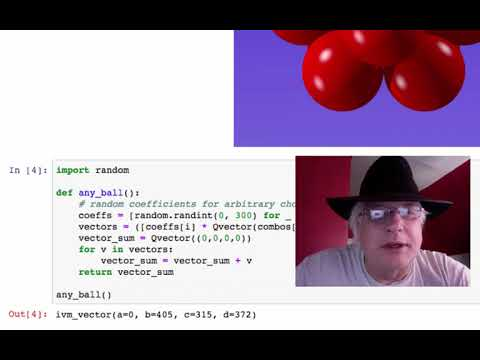

In [16]:
from IPython.display import YouTubeVideo
YouTubeVideo("wLHescQT2ZI") # https://youtu.be/wLHescQT2ZI